In [5]:
pip install astroML

  Using cached astroML-1.0.2.post1-py3-none-any.whl (134 kB)
You should consider upgrading via the '/Users/daniele/kerasenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

In [2]:
import numpy as np
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm
# from sklearn.neighbors import KernelDensity

from astropy.visualization import hist

Rejection Sampling

(array([ 20.,  81., 226., 313., 330., 384., 401., 368., 484., 473., 558.,
        608., 557., 616., 602., 561., 551., 379., 385., 359., 286., 239.,
        209., 164., 157., 131., 104.,  79.,  67.,  63.,  45.,  25.,  22.,
         32.,  28.,   9.,  23.,  12.,  20.,   8.,   1.,   5.,   2.,   5.,
          1.,   2.,   4.,   0.,   0.,   1.]),
 array([0.0802    , 0.186866  , 0.29353198, 0.40019798, 0.50686401,
        0.61352998, 0.72019601, 0.82686198, 0.93352795, 1.04019392,
        1.14686   , 1.25352597, 1.36019194, 1.46685791, 1.573524  ,
        1.68018997, 1.78685594, 1.8935219 , 2.00018787, 2.10685396,
        2.21352005, 2.3201859 , 2.42685199, 2.53351784, 2.64018393,
        2.74685001, 2.85351586, 2.96018195, 3.0668478 , 3.17351389,
        3.28017998, 3.38684583, 3.49351192, 3.600178  , 3.70684385,
        3.81350994, 3.92017579, 4.02684164, 4.13350773, 4.24017382,
        4.3468399 , 4.45350599, 4.56017208, 4.66683769, 4.77350378,
        4.88016987, 4.98683596, 5.09350204, 5.

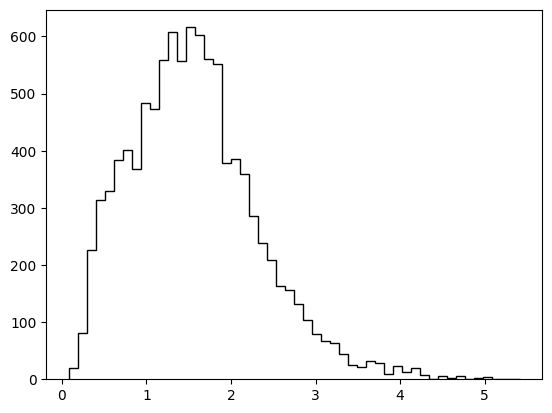

In [3]:
plt.hist(z, bins=50, histtype='step', color='black')

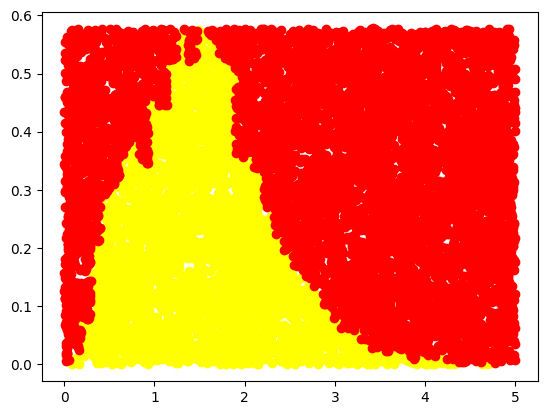

(array([0.01875012, 0.07593799, 0.21187633, 0.29343926, 0.30937702,
        0.36000215, 0.37593996, 0.34500226, 0.45375297, 0.44343991,
        0.52312842, 0.57000373, 0.52219092, 0.57750313, 0.56437869,
        0.52594094, 0.51656588, 0.35531482, 0.36093946, 0.33656433,
        0.26812705, 0.22406372, 0.195939  , 0.15375083, 0.1471883 ,
        0.12281344, 0.09750053, 0.07406307, 0.06281284, 0.05906282,
        0.04218782, 0.02343763, 0.02062511, 0.03000023, 0.02625014,
        0.00843756, 0.02156267, 0.01125006, 0.0187501 , 0.00750004,
        0.00093751, 0.00468753, 0.00187502, 0.00468753, 0.00093751,
        0.00187501, 0.00375002, 0.        , 0.        , 0.00093751]),
 array([0.0802    , 0.186866  , 0.29353198, 0.40019798, 0.50686401,
        0.61352998, 0.72019601, 0.82686198, 0.93352795, 1.04019392,
        1.14686   , 1.25352597, 1.36019194, 1.46685791, 1.573524  ,
        1.68018997, 1.78685594, 1.8935219 , 2.00018787, 2.10685396,
        2.21352005, 2.3201859 , 2.42685199, 2.

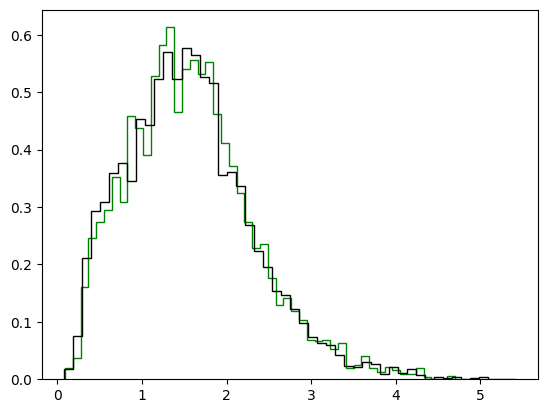

In [4]:
from scipy.stats import rv_histogram
# Create a histogram and convert it to a probability density function
N=10000
n, bins = np.histogram(z, bins=50, density=True)
r=rv_histogram((n, bins))
# Create a range of x values for plotting the PDF
x = np.random.uniform(0, 5, N)
y=np.random.uniform(0, n.max(), N)
# Calculate the PDF values for the x range
f=r.pdf(x)#this is my "f(x)" function
plt.scatter(x[y<f],y[y<f],c='yellow')
plt.scatter(x[y>f],y[y>f],c='red')

plt.show()
goodpoints = x[y<r.pdf(x)]

plt.hist(goodpoints,bins=50,density=True,histtype='step',color='green')
plt.hist(z, bins=50, histtype='step',density=True, color='black')


Inverse Transform Sampling

(array([0.01875012, 0.07593799, 0.21187633, 0.29343926, 0.30937702,
        0.36000215, 0.37593996, 0.34500226, 0.45375297, 0.44343991,
        0.52312842, 0.57000373, 0.52219092, 0.57750313, 0.56437869,
        0.52594094, 0.51656588, 0.35531482, 0.36093946, 0.33656433,
        0.26812705, 0.22406372, 0.195939  , 0.15375083, 0.1471883 ,
        0.12281344, 0.09750053, 0.07406307, 0.06281284, 0.05906282,
        0.04218782, 0.02343763, 0.02062511, 0.03000023, 0.02625014,
        0.00843756, 0.02156267, 0.01125006, 0.0187501 , 0.00750004,
        0.00093751, 0.00468753, 0.00187502, 0.00468753, 0.00093751,
        0.00187501, 0.00375002, 0.        , 0.        , 0.00093751]),
 array([0.0802    , 0.186866  , 0.29353198, 0.40019798, 0.50686401,
        0.61352998, 0.72019601, 0.82686198, 0.93352795, 1.04019392,
        1.14686   , 1.25352597, 1.36019194, 1.46685791, 1.573524  ,
        1.68018997, 1.78685594, 1.8935219 , 2.00018787, 2.10685396,
        2.21352005, 2.3201859 , 2.42685199, 2.

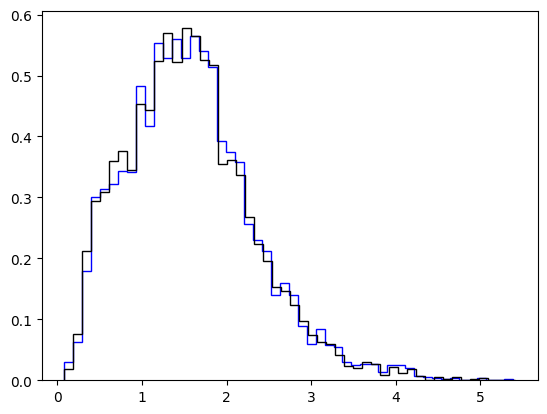

In [5]:
eps = np.random.uniform(0, 1, 10000)
samples = r.ppf(eps)
plt.hist(samples, bins=50, histtype='step', density=True, color='blue')
plt.hist(z, bins=50, histtype='step', density=True, color='black')

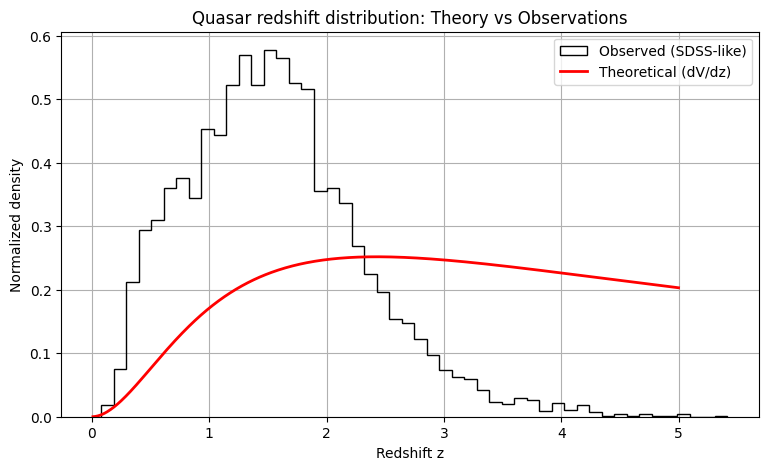

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo

z_data = z  

# Theoretical distribution based on cosmology: dV/dz
z_theory = np.linspace(0.01, 5, 500)
dV_dz = cosmo.differential_comoving_volume(z_theory).value  # Mpc^3 / sr

# Normalization
A=np.trapz(dV_dz, z_theory) #Area under the curve
dV_dz_norm = dV_dz / A


plt.figure(figsize=(9, 5))

# Observed redshift histogram (normalized)
plt.hist(z_data, bins=50, density=True, histtype='step', color='black', label='Observed (SDSS-like)')

# Theoretical curve
plt.plot(z_theory, dV_dz_norm, 'r-', lw=2, label='Theoretical (dV/dz)')

# Labels and legend
plt.xlabel('Redshift z')
plt.ylabel('Normalized density')
plt.title('Quasar redshift distribution: Theory vs Observations')
plt.legend()
plt.grid(True)
plt.show()

